<B/> <span style="font-family:Garamond; font-size:2em;"><font color="Blue"/> Problem Statement

<span style="font-family:Garamond; font-size:1.3em;">You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [95]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<B/> <span style="font-family:Garamond; font-size:2em;"><font color="Blue"/>Read the Data & EDA

In [96]:
df=pd.read_csv("Holiday_Package.csv")

In [97]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [98]:
df=df.drop('Unnamed: 0',axis=1)

In [99]:
df.head(2)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


<span style="font-family:Garamond; font-size:1.1em;">The  dataset is having the data types as Object and Integer

In [101]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [103]:
df.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [104]:
df.shape

(872, 7)

In [105]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(872, 7)


<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Geting unique counts of all Objects

In [106]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Descriptive Ananlysis

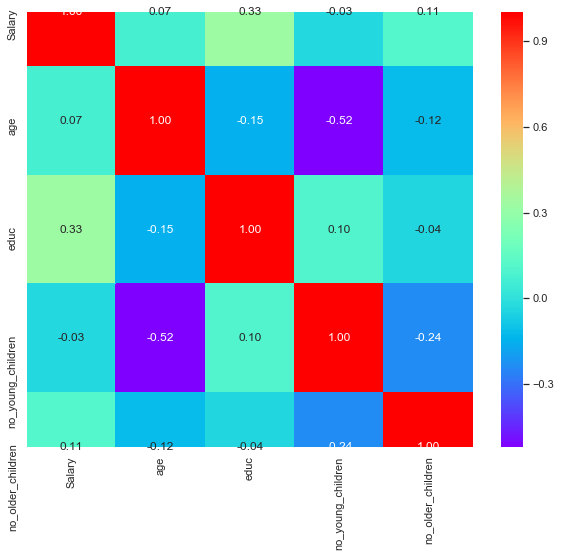

In [107]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Check for Outliers

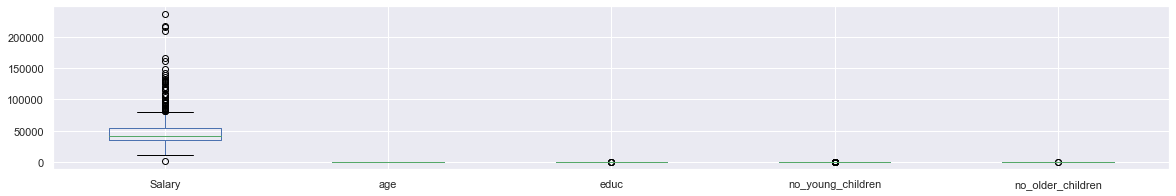

In [108]:
df.boxplot(figsize=(20,3))

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Treatment of Outliers

In [109]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [110]:
lratio,uratio=remove_outlier(df['Salary'])
df['Salary']=np.where(df['Salary']>uratio,uratio,df['Salary'])
df['Salary']=np.where(df['Salary']<lratio,lratio,df['Salary'])

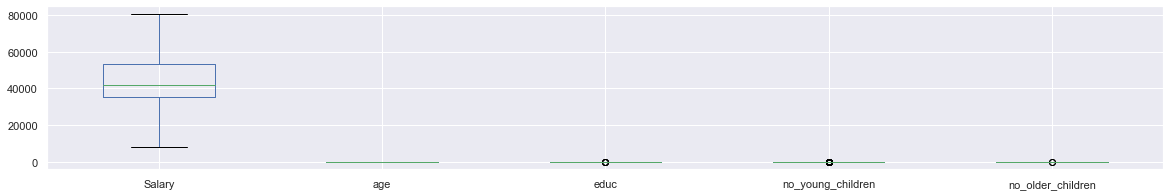

In [111]:
df.boxplot(figsize=(20,3))

In [112]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,45608.3,15699.7,8105.75,35324,41903.5,53469.5,80687.8
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Converting all objects to categorical codes

In [113]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 1
(872, 7)


In [114]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [115]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null int8
Salary               872 non-null float64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null int8
dtypes: float64(1), int64(4), int8(2)
memory usage: 35.9 KB


In [117]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.307339,3.036259,1.00,8.0,9.0,12.0,21.00
no_young_children,872.0,0.311927,0.612870,0.00,0.0,0.0,0.0,3.00
no_older_children,872.0,0.982798,1.086786,0.00,0.0,1.0,2.0,6.00
foreign,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


In [118]:
df.no_young_children.value_counts(normalize=True)

0    0.762615
1    0.168578
2    0.063073
3    0.005734
Name: no_young_children, dtype: float64

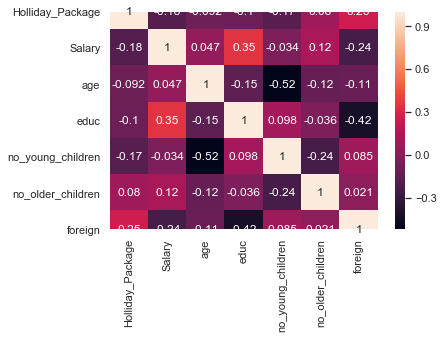

In [119]:
sns.heatmap(df.corr(), annot=True)

In [120]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


<B/> <span style="font-family:Garamond; font-size:2em;"><font color="Blue"/>Train - Test Split for Logistic Regression

In [121]:
X = df.drop('Holliday_Package', axis=1)
Y = df['Holliday_Package']

In [122]:
X.head(2)

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0


In [123]:
Y.head(2)

0    0
1    1
Name: Holliday_Package, dtype: int8

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Split the data into Train- Test (70:30)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Fit the Logistic Regression Model

In [125]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    6.6s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Predicting on Train and Test database

In [126]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Getting the predicted class and probs

In [127]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.773610,0.226390
1,0.272671,0.727329
2,0.902697,0.097303
3,0.958479,0.041521
4,0.512982,0.487018


<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Performance Matrix

In [128]:
# Accuracy - Training Data
Logistic_train_acc=model.score(X_train, y_train)
Logistic_train_acc

0.6754098360655738

AUC: 0.742


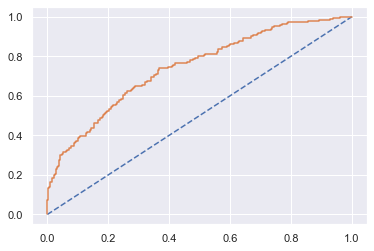

In [129]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logistic_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % Logistic_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [130]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6374045801526718

AUC: 0.705


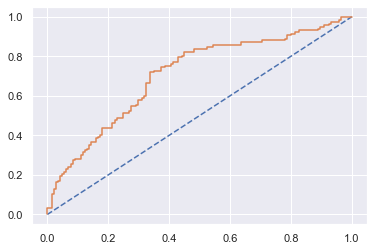

In [131]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logistic_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % Logistic_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [132]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [124, 160]], dtype=int64)

In [133]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [134]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[102,  43],
       [ 52,  65]], dtype=int64)

In [135]:
#Test Data Accuracy
Logistic_test_acc=model.score(X_test,y_test)
Logistic_test_acc

0.6374045801526718

In [136]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



<B/> <span style="font-family:Garamond; font-size:2em;"><font color="Blue"/>Train - Test Split for Linear Discrimination Analysis (LDA)

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Split the data

In [138]:
X = df.drop('Holliday_Package', axis=1)
Y = df['Holliday_Package']

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [140]:
X.head(2)

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0


<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Fit the LDA Model

In [141]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [142]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Performance Matrix

In [166]:
LDA_train_acc=model.score(X_train, y_train)
LDA_train_acc

0.6737704918032786

AUC: 0.735


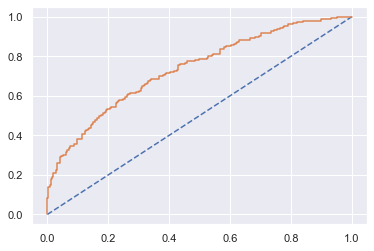

In [167]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [168]:
LDA_test_acc=model.score(X_test, y_test)
LDA_test_acc

0.6603053435114504

AUC: 0.709


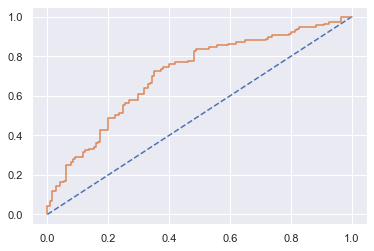

In [169]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [170]:
confusion_matrix(y_train, ytrain_predict)

array([[254,  72],
       [126, 158]], dtype=int64)

In [171]:
confusion_matrix(y_train, ytrain_predict)
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [172]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[103,  42],
       [ 52,  65]], dtype=int64)

In [173]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.6603053435114504

In [174]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [175]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Precision, Recall and F1 score of Logistic Regression and LDA

In [176]:
Logistic_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(Logistic_metrics).transpose()
Logistic_train_precision=round(df.loc["1"][1],2)
Logistic_train_recall=round(df.loc["1"][2],2)
Logistic_train_f1=round(df.loc["1"][0],2)
print ('Logistic_train_precision ',Logistic_train_precision)
print ('Logistic_train_recall ',Logistic_train_recall)
print ('Logistic_train_f1 ',Logistic_train_f1)

Logistic_train_precision  0.54
Logistic_train_recall  0.61
Logistic_train_f1  0.69


In [177]:
Logistic_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(Logistic_metrics).transpose()
Logistic_test_precision=round(df.loc["1"][1],2)
Logistic_test_recall=round(df.loc["1"][2],2)
Logistic_test_f1=round(df.loc["1"][0],2)
print ('Logistic_test_precision ',Logistic_test_precision)
print ('Logistic_test_recall ',Logistic_test_recall)
print ('Logistic_test_f1 ',Logistic_test_f1)

Logistic_test_precision  0.57
Logistic_test_recall  0.6
Logistic_test_f1  0.63


In [178]:
   LDA_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][1],2)
LDA_test_recall=round(df.loc["1"][2],2)
LDA_test_f1=round(df.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.57
LDA_test_recall  0.6
LDA_test_f1  0.63


In [179]:
 LDA_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][1],2)
LDA_train_recall=round(df.loc["1"][2],2)
LDA_train_f1=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.54
LDA_train_recall  0.61
LDA_train_f1  0.69


<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>Comparison between Logistic Regression and LDA

In [180]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Train':[Logistic_train_acc,Logistic_train_auc,Logistic_train_recall,Logistic_train_precision,Logistic_train_f1],
        'Logistic Test':[Logistic_test_acc,Logistic_test_auc,Logistic_test_recall,Logistic_test_precision,Logistic_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1]
      },index=index)
round(data,2)

,Logistic Train,Logistic Test,LDA Train,LDA Test
Accuracy,0.68,0.64,0.67,0.66
AUC,0.74,0.70,0.73,0.71
Recall,0.61,0.60,0.61,0.60
Precision,0.54,0.57,0.54,0.57
F1 Score,0.69,0.63,0.69,0.63


<span style="font-family:Garamond; font-size:1.2em;">Comparing with both the models, we can interfere that both the models are sharing similar outputs. So both the models are good, but Logistic Regression is a better model compared to LDA. The accuracy of LDA is 67% and Logistic Regression is 68%, there is only 1% difference in both the models.

<B/> <span style="font-family:Garamond; font-size:1.2em;"><font color="Purple"/>LDA on the basis of Xand Y factors

In [158]:
LDA = LinearDiscriminantAnalysis()
model=LDA.fit(X,Y)
model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [159]:
pred_class = model.predict(X)

In [160]:
confusion_matrix(Y, pred_class)

array([[364, 107],
       [181, 220]], dtype=int64)

In [161]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       471
           1       0.67      0.55      0.60       401

    accuracy                           0.67       872
   macro avg       0.67      0.66      0.66       872
weighted avg       0.67      0.67      0.66       872



In [162]:
model.score(X,Y)

0.6697247706422018

In [163]:
pd.DataFrame(pred_class).head()

,0
0,0
1,0
2,0
3,0
4,0


In [164]:
LDA=classification_report(Y, pred_class,output_dict=True)
df=pd.DataFrame(LDA).transpose()
LDA_precision=round(df.loc["1"][1],2)
LDA_recall=round(df.loc["1"][2],2)
LDA_f1=round(df.loc["1"][0],2)
print ('LDA_precision ',LDA_precision)
print ('LDA_recall ',LDA_recall)
print ('LDA_f1 ',LDA_f1)

LDA_precision  0.55
LDA_recall  0.6
LDA_f1  0.67


AUC: 0.728


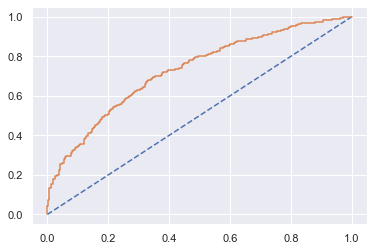

In [165]:
# predict probabilities
probs = model.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)